Data Preparation

In [13]:
#importing necessary modules

import numpy as np
import matplotlib.pyplot as plt
import pydicom
from PIL import Image


import warnings             #ignore runtime error warnings
warnings.filterwarnings("ignore")


In [3]:
#  listing path names for images

pre_path = 'data/manifest-1722210581008/ISPY2/ISPY2-100899/10-26-2002-100899T0-ISPY2MRIT0-88595/500.000000-ISPY2 AX VIBRANT-SERIES-52523/1-042.dcm'
post_path = 'data/manifest-1722210581008/ISPY2/ISPY2-100899/10-26-2002-100899T0-ISPY2MRIT0-88595/501.000000-ISPY2 Ph1AX VIBRANT-SERIES-03969/1-042.dcm'

Masking

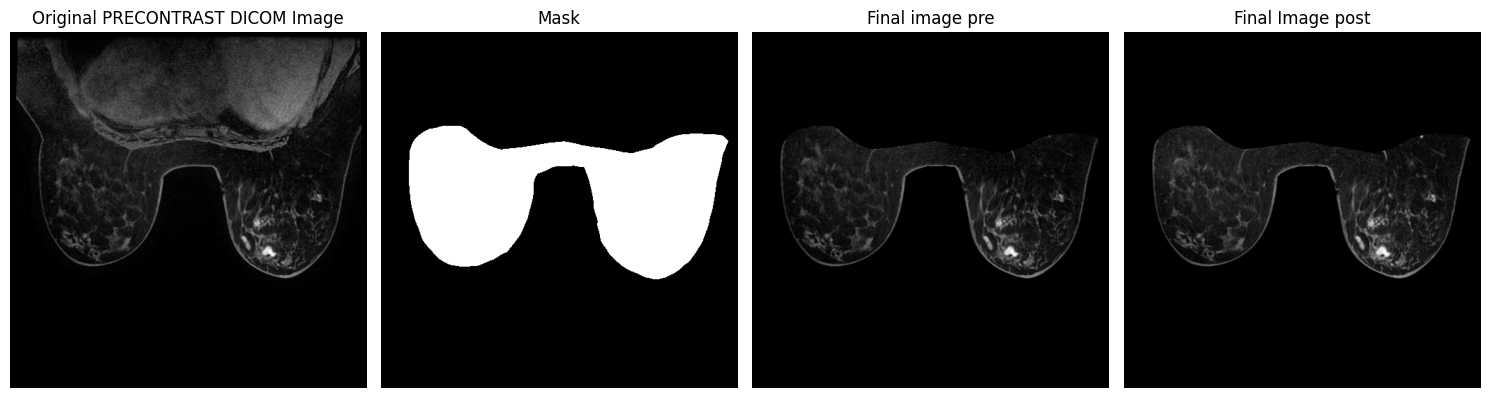

In [4]:


#data preparation and loading
dicom_path = pre_path
dicom_image = pydicom.dcmread(dicom_path)
predicom_array = dicom_image.pixel_array

dicom_path2 = post_path
dicom_image2 = pydicom.dcmread(dicom_path2)
postdicom_array = dicom_image2.pixel_array


mask_path = 'mask/precontrast_mask.png'
mask_image = Image.open(mask_path).convert('L')  #make sure it's greyscale 
mask_array = np.array(mask_image)



#0 or 1
mask_array = (mask_array > 0).astype(np.uint8)


#The multiplication
masked_array = predicom_array * mask_array
masked_array2 = postdicom_array * mask_array


#Save the array (optional)
np.save('saved_data/masked_array.npy', masked_array)
np.save('saved_data/masked_array2.npy', masked_array2)


#Plotting our results below
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(predicom_array, cmap='gray')
axes[0].set_title('Original PRECONTRAST DICOM Image')
axes[0].axis('off')

axes[1].imshow(mask_array, cmap='gray')
axes[1].set_title('Mask')
axes[1].axis('off')

axes[2].imshow(masked_array, cmap='gray')
axes[2].set_title('Final image pre')
axes[2].axis('off')

axes[3].imshow(masked_array2, cmap='gray')
axes[3].set_title('Final Image post')
axes[3].axis('off')



plt.tight_layout()
plt.show()


Now plotting a histogram of the signal intensities for the new pre and post contrast

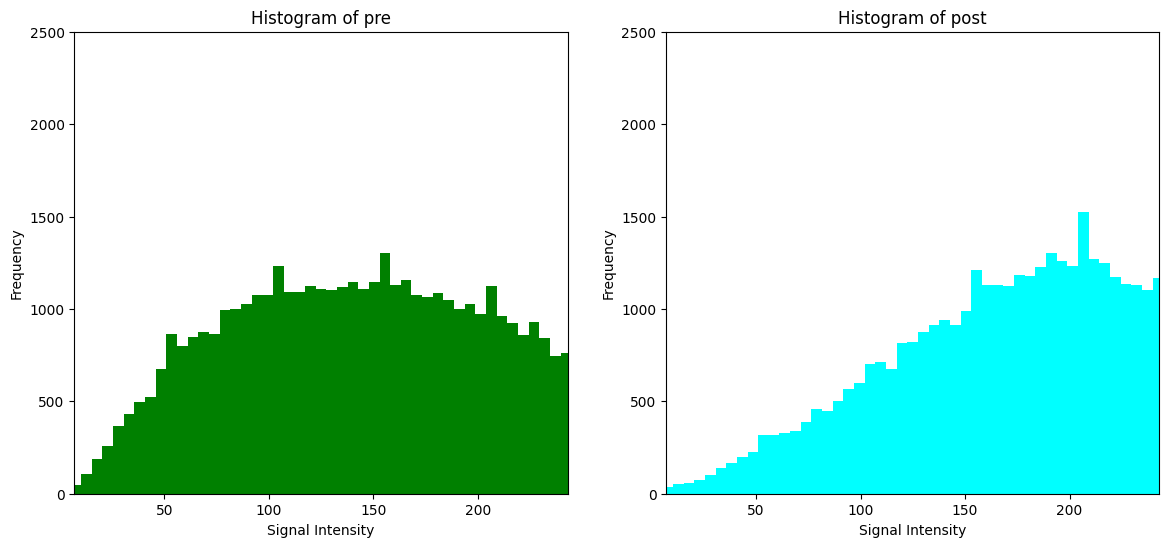

In [5]:

#flattening to 2D (optional)
masked_array_flat = masked_array.flatten()
masked_array2_flat = masked_array2.flatten()

#plotting pre contrast signal intensity
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(masked_array_flat, 
         bins=50, 
         color='green',  #can put any color
         range=(0, 255), 
         histtype='stepfilled')
plt.title('Histogram of pre')
plt.xlabel('Signal Intensity')
plt.ylabel('Frequency')
plt.xlim(7, 243)
plt.ylim(0, 2500)

#plotting post contrast signal intensity
plt.subplot(1, 2, 2)
plt.hist(masked_array2_flat, 
         bins=50, 
         color='cyan',    #can put any color
         range=(0, 255), 
         histtype='stepfilled')
plt.title('Histogram of post')
plt.xlabel('Signal Intensity')
plt.ylabel('Frequency')
plt.xlim(7, 243)
plt.ylim(0, 2500)

plt.show()




in a numerical array format:
       We can see how some of the values are 0 - showing that after multiplication, some of the pixels are set to value 0

MORE GRAPHS FOR VISUALIZATION

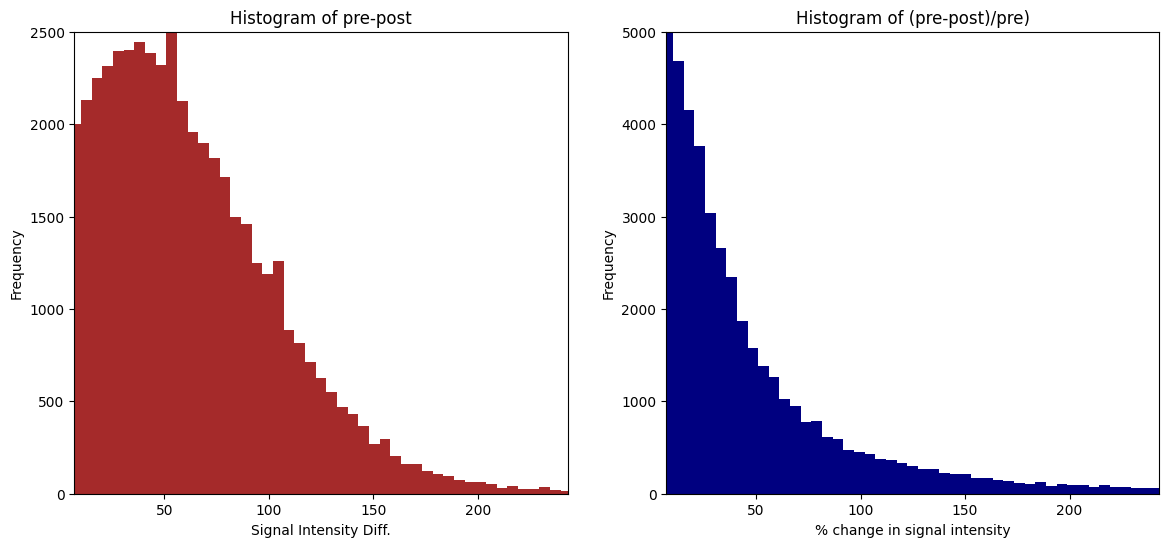

In [6]:
#more graphs for visualization

                                                                                                                # PLOT &1
#plotting pre-post subtraction signal intensity
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(masked_array2_flat-masked_array_flat, 
         bins=50, 
         color='brown',    #can put any color
         range=(0, 255), 
         histtype='stepfilled')
plt.title('Histogram of pre-post')
plt.xlabel('Signal Intensity Diff.')
plt.ylabel('Frequency')
plt.xlim(7, 243)
plt.ylim(0, 2500)

                                                                                                                # PLOT &2
#plotting (pre-post)/pre signal intensity
plt.subplot(1, 2, 2)
plt.hist( np.where(masked_array_flat != 0, 
                   ((masked_array2_flat - masked_array_flat) / masked_array_flat) * 100, 0), #divide by 0 error
                   bins=50, 
                   color='navy',    #can put any color
                   range=(0, 255), 
                   histtype='stepfilled')     #this is default setting
plt.title('Histogram of (pre-post)/pre)')
plt.xlabel('% change in signal intensity')
plt.ylabel('Frequency')
plt.xlim(7, 243)
plt.ylim(0, 5000)


                                   #     SAME CODE AS &2, WITHOUT DB0 ERROR 
# plt.subplot(1, 3, 3)
# plt.hist((masked_array2_flat-masked_array_flat)/masked_array_flat * 100, 
#             bins=50, 
#             color='orange',  
#             range=(0, 255))
# plt.title('Histogram of (pre-post)/pre)')
# plt.xlabel('% change in signal intensity')
# plt.ylabel('Frequency')
# plt.xlim(5, 250)
# plt.ylim(0, 5000)


plt.show()




ValueError: x and y must have same first dimension, but have shapes (2450,) and (512, 512)

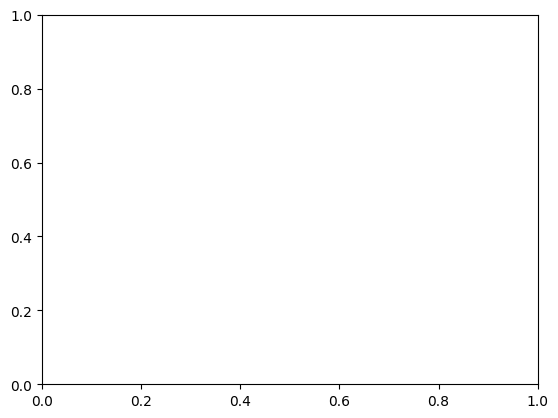

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(5, 250, 0.1)
y = masked_array
fig, ax = plt.subplots()
ax.plot(x, y)

Finally, we are going to calculate BPE (WORK IN PROGRESS)

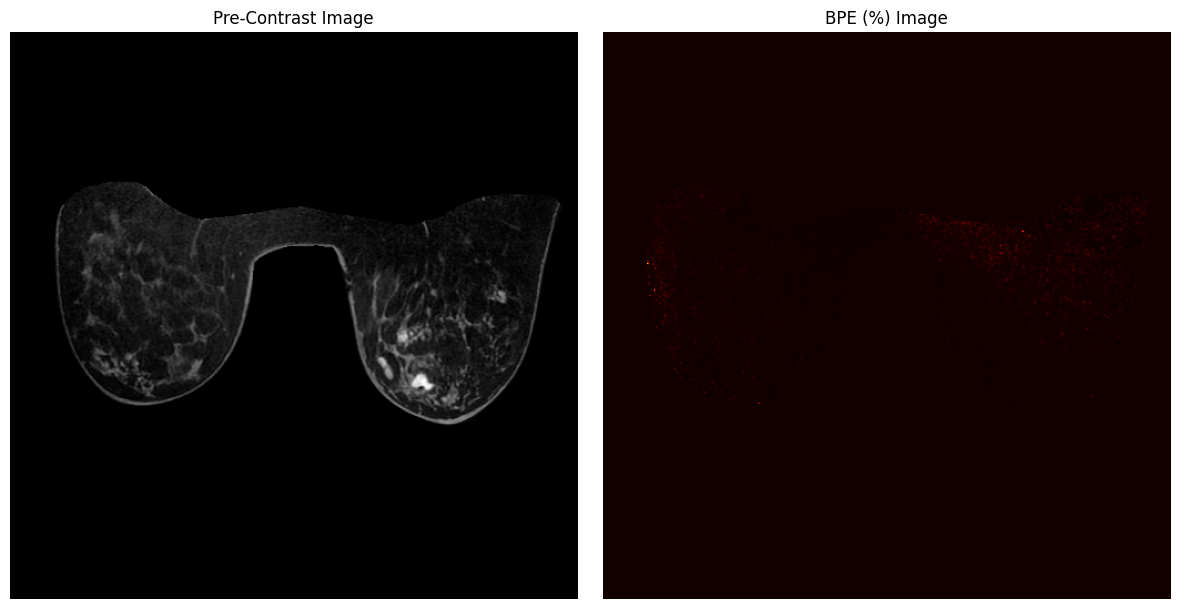

In [9]:
# Load arrays from .npy files
pre_array = np.load('saved_data/masked_array.npy')
post_array = np.load('saved_data/masked_array2.npy')

# Calculate BPE as a percentage
bpe_percentage = np.where(pre_array != 0, (post_array - pre_array) / pre_array * 100, 0)

#NORMALIZING:   bpe_normalized = np.clip(((bpe_percentage - bpe_percentage.min()) / (bpe_percentage.max() - bpe_percentage.min()) * 255), 0, 255).astype(np.uint8)

#plotting pre contrast
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(pre_array, cmap='gray')
plt.title('Pre-Contrast Image')
plt.axis('off')

#plotting hot image of bpe percentage
#another way to visualize bpe percentage
plt.subplot(1, 2, 2)
plt.imshow(bpe_percentage, cmap='hot') 
plt.title('BPE (%) Image')
plt.axis('off')

plt.tight_layout()
plt.show()

